In [148]:
import matplotlib.pyplot as pyplot
import numpy
import math

In [149]:
# weights = [1,2,3,2.5,6,1.5,5,1,2,1,3,5,1]
weights = [1,20,1]

In [150]:
# points = [(39.5,10.5),(30,20),(6,6),(13,-12),(63,-12.5),
        #   (18.5,17.5),(48,63),(7,25.5),(48.5,49.5),(9,19.5),
        #   (48.5,35.5),(59,32.5),(56,20.5)]
points = [(0,0),(10,20),(20,0)]

In [151]:
def bernsteinPolynomial(n, i, x):
    return math.comb(n, i) * x**i * (1-x)**(n-i)

In [152]:
def s(n, t, weights):
    s = 0
    for i in range(n):
        s += weights[i] * bernsteinPolynomial(n, i, t)
    return s

In [153]:
def alpha(n, i, weights, t):
    return (1 / s(n, t, weights)) * weights[i] * bernsteinPolynomial(n, i, t)

In [154]:
def vector(alpha, point_1, point_2):
    return (alpha * (point_1[0] - point_2[0]),
            alpha * (point_1[1] - point_2[1]))

In [155]:
def rationalBezierCurve(points, weigths, x):
    result = points[0]
    n = len(points)
    for i in range(1, n):
        alpha_i = alpha(n, i, weights, x)
        vector_i = vector(alpha_i, points[i], points[0])
        result = (result[0] + vector_i[0],
                  result[1] + vector_i[1])

    return result

In [156]:
plotPoints = []
for k in range(100):
    argument = k / 100
    plotPoints.append(rationalBezierCurve(points, weights, argument))

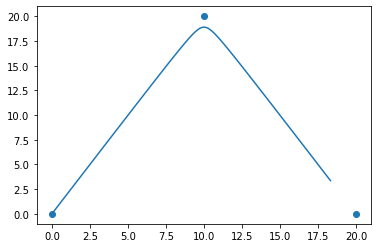

In [157]:
X = [x for (x, y) in plotPoints]
Y = [y for (x, y) in plotPoints]

pX = [x for (x, y) in points]
pY = [y for (x, y) in points]

pyplot.scatter(pX, pY)
pyplot.plot(X, Y)